In [1]:
import pandas as pd

In [3]:
emp_data = pd.read_csv('data/HR_comma_sep.csv')

In [4]:
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
emp_leaving = 1 - emp_data.groupby('number_project').left.mean()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

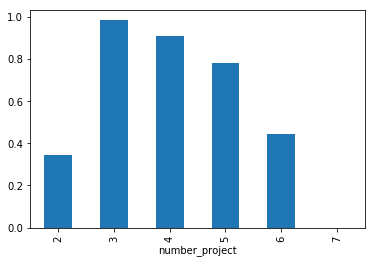

In [11]:
emp_leaving.plot.bar()

In [14]:
emp_data.average_montly_hours.min()

96

In [15]:
emp_data.average_montly_hours.max()

310

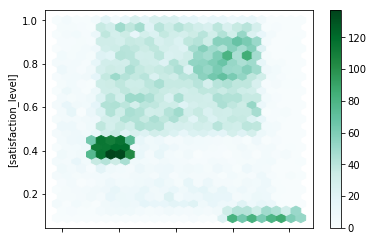

In [17]:
emp_data.plot.hexbin(x=['average_montly_hours'],y=['satisfaction_level'], gridsize=25)

In [19]:
emp_data.rename(columns={'sales':'dept'}, inplace=True)

In [20]:
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
emp_data.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [22]:
from sklearn_pandas import DataFrameMapper

In [24]:
emp_data.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'dept',
 'salary']

In [25]:
feature_data = emp_data.drop(['left'],axis=1)

In [26]:
target_data = emp_data.left

In [30]:
no_action = list(set(feature_data.columns.tolist()) - set(['dept', 'salary']))

In [34]:
from sklearn.preprocessing import LabelEncoder

In [33]:
no_action_f = list(map(lambda x:(x,None),no_action))

In [61]:
mapper = DataFrameMapper([
    *no_action_f,
    ('dept',LabelEncoder()),
    ('salary',LabelEncoder())
])

In [62]:
mapper

DataFrameMapper(default=False, df_out=False,
        features=[('number_project', None), ('average_montly_hours', None), ('Work_accident', None), ('promotion_last_5years', None), ('satisfaction_level', None), ('last_evaluation', None), ('time_spend_company', None), ('dept', LabelEncoder()), ('salary', LabelEncoder())],
        input_df=False, sparse=False)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [71]:
models = [KNeighborsClassifier(), 
          AdaBoostClassifier(n_estimators=10),
          RandomForestClassifier(n_estimators=10)]

models_name = ['nn','ab','rf']
pipelines = []

for model in models:
    pipeline = Pipeline([
       ('featurizer',mapper),
       ('selectK', SelectKBest(k=8)),
       ('pca',PCA(n_components=4)),
       ('rf',RandomForestClassifier(n_estimators=10))
    ])
    pipelines.append(pipeline)

In [77]:
from sklearn.model_selection import train_test_split
trainX,testX, trainY, testY = train_test_split(feature_data, target_data)

In [78]:
trained_pipelines = []
for pipeline in pipelines:
    pipeline.fit(trainX,trainY)
    trained_pipelines.append(pipeline)

In [80]:
for pipeline in trained_pipelines:
    print (pipeline.score(testX,testY))

0.9728
0.969866666667
0.9704
